# Assignment 4 : SVM

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import MinMaxScaler


## Pre Processing on Titanic Data Set

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [3]:
titanic.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [4]:
titanic = titanic.dropna()

In [5]:
X = titanic.copy()
for fn in X.columns:
    if len(X[fn].unique()) == 1:
        X = X.drop(columns = [fn])
Y = titanic['2urvived']
X = X.drop(columns = ['Passengerid','2urvived'])
print(X.shape)
print(Y.shape)
X.head()

(1307, 7)
(1307,)


,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,22.0,7.2500,0,1,0,3,2.0
1,38.0,71.2833,1,1,0,1,0.0
2,26.0,7.9250,1,0,0,3,2.0
3,35.0,53.1000,1,1,0,1,2.0
4,35.0,8.0500,0,0,0,3,2.0


In [6]:
scaler = MinMaxScaler()
X[['Age', 'Fare','Parch','sibsp']] = scaler.fit_transform(X[['Age', 'Fare','Parch','sibsp']])
X.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,0.273456,0.014151,0,0.125,0.0,3,2.0
1,0.473882,0.139136,1,0.125,0.0,1,0.0
2,0.323563,0.015469,1,0.000,0.0,3,2.0
3,0.436302,0.103644,1,0.125,0.0,1,2.0
4,0.436302,0.015713,0,0.000,0.0,3,2.0


In [7]:
pclass = X['Pclass'].values.reshape(-1, 1)
embarked = X['Embarked'].values.reshape(-1, 1)
sex = X['Sex'].values.reshape(-1, 1)

ohe = OneHotEncoder()

pclass_ohe = ohe.fit_transform(pclass)
embarked_ohe = ohe.fit_transform(embarked)
sex_ohe = ohe.fit_transform(sex)

In [8]:
t_n = X[['Age', 'Fare', 'Parch','sibsp']]
X = hstack((t_n, embarked_ohe, sex_ohe, pclass_ohe))
print(X.shape)

(1307, 12)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.2, random_state = 10)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1045, 12) (262, 12)
(1045,) (262,)


## Task 1

In [10]:
kernel, degree, n_0, n_1, acc = [], [], [], [], []

In [11]:
model = SVC(kernel = 'linear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(model.n_support_)
kernel.append('Linear')
degree.append('NA')
n_0.append(model.n_support_[0])
n_1.append(model.n_support_[1])
acc.append(accuracy_score(y_test, y_pred))

0.7938931297709924
[271 260]


In [12]:
model = SVC(kernel = 'poly', degree = 2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(model.n_support_)
kernel.append('Polynomial')
degree.append('2')
n_0.append(model.n_support_[0])
n_1.append(model.n_support_[1])
acc.append(accuracy_score(y_test, y_pred))

0.7938931297709924
[245 228]


In [13]:
model = SVC(kernel = 'poly', degree = 3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(model.n_support_)
kernel.append('Polynomial')
degree.append('3')
n_0.append(model.n_support_[0])
n_1.append(model.n_support_[1])
acc.append(accuracy_score(y_test, y_pred))

0.7824427480916031
[246 223]


In [14]:
model = SVC(kernel = 'poly', degree = 5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(model.n_support_)
kernel.append('Polynomial')
degree.append('5')
n_0.append(model.n_support_[0])
n_1.append(model.n_support_[1])
acc.append(accuracy_score(y_test, y_pred))

0.7786259541984732
[256 222]


In [15]:
model = SVC(kernel = 'rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(model.n_support_)
kernel.append('RBF')
degree.append('NA')
n_0.append(model.n_support_[0])
n_1.append(model.n_support_[1])
acc.append(accuracy_score(y_test, y_pred))

0.7748091603053435
[249 227]


In [16]:
model = SVC(kernel = 'sigmoid')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(model.n_support_)
kernel.append('Sigmoid')
degree.append('NA')
n_0.append(model.n_support_[0])
n_1.append(model.n_support_[1])
acc.append(accuracy_score(y_test, y_pred))

0.6564885496183206
[205 204]


In [17]:
comp = pd.DataFrame(zip(kernel, degree, n_0, n_1, acc), columns = ['Kernel', 'Degree', 'Class 0 SVs', 'Class 1 SVs', 'Accuracy'])
comp

,Kernel,Degree,Class 0 SVs,Class 1 SVs,Accuracy
0,Linear,NA,271,260,0.793893
1,Polynomial,2,245,228,0.793893
2,Polynomial,3,246,223,0.782443
3,Polynomial,5,256,222,0.778626
4,RBF,NA,249,227,0.774809
5,Sigmoid,NA,205,204,0.656489


## Task 2

In [18]:
titanic_red = titanic[['Age','Fare','2urvived']]

In [19]:
scaler = MinMaxScaler()
titanic_red[['Age', 'Fare']] = scaler.fit_transform(titanic_red[['Age', 'Fare']])
titanic_red.head()

/home/hakunamatata/.local/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Age,Fare,2urvived
0,0.273456,0.014151,0
1,0.473882,0.139136,1
2,0.323563,0.015469,1
3,0.436302,0.103644,1
4,0.436302,0.015713,0


In [20]:
x_trainr, x_testr, y_trainr, y_testr = train_test_split(titanic_red[['Age', 'Fare']], titanic_red['2urvived'], test_size = 0.2, stratify = titanic_red['2urvived'], random_state = 42)
print(x_trainr.shape, y_trainr.shape)
print(x_testr.shape, y_testr.shape)

(1045, 2) (1045,)
(262, 2) (262,)


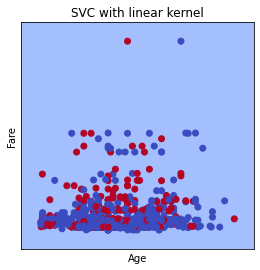

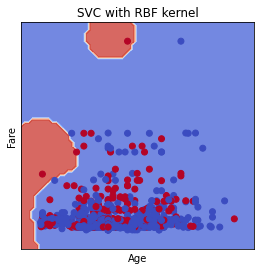

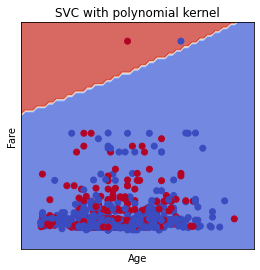

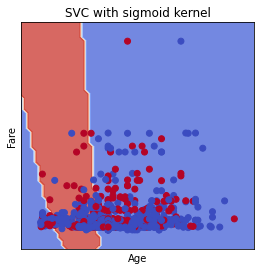

In [21]:
# https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
xr, yr = x_trainr.values, y_trainr.values

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear')
rbf_svc = SVC(kernel='rbf')
poly_svc = SVC(kernel='poly')
sigmoid = SVC(kernel='sigmoid')

# create a mesh to plot in
x_min, x_max = xr[:, 0].min() - 0.1, xr[:, 0].max() + 0.1
y_min, y_max = xr[:, 1].min() - 0.1, xr[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial kernel',
          'SVC with sigmoid kernel']


for i, clf in enumerate((svc, rbf_svc, poly_svc,sigmoid)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.figure(figsize = (10,10))
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    clf.fit(xr, yr)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(xr[:, 0], xr[:, 1], c=yr, cmap=plt.cm.coolwarm)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

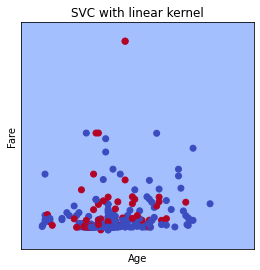

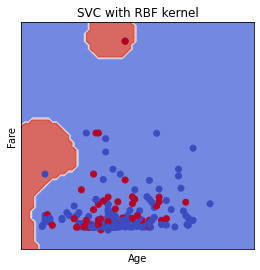

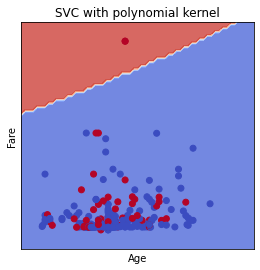

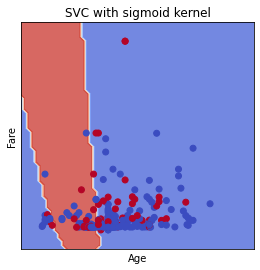

In [22]:
xr, yr = x_testr.values, y_testr.values

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = -0.1, 1.1
y_min, y_max = -0.1, 1.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial kernel',
          'SVC with sigmoid kernel']


for i, clf in enumerate((svc, rbf_svc, poly_svc,sigmoid)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.figure(figsize = (10,10))
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(xr[:, 0], xr[:, 1], c=yr, cmap=plt.cm.coolwarm)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [23]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [24]:
def log_kernel(xi, xj, d):
    s = 0
    for k in range(d):
        s += pow((xi[k] - xj[k]), d)
    return  0 if not s else -np.log(pow(s, 1/d)) + 1 

In [25]:
def logKernelGramMatrixFull(X1, X2):
    """(Pre)calculates Gram Matrix K"""

    log_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    d = X1.shape[-1]
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            x1 = x1.flatten()
            x2 = x2.flatten()
            log_matrix[i, j] = log_kernel(x1, x2, d)
    return log_matrix

In [26]:
log_svc = SVC(C = 100, kernel = "precomputed")
log_svc.fit(logKernelGramMatrixFull(x_train, x_train), y_train)
y_pred = log_svc.predict(logKernelGramMatrixFull(x_test, x_train))
acc = accuracy_score(y_test, y_pred)
print(acc)

0.732824427480916


## Task 3

In [27]:
l,r = 1, 10000
i = 0
accs, cs = [],[]
while l < r:
    if i == 20: break
    mid = (r+l)/2
    lsvc = SVC(kernel = 'rbf', C = l, gamma = 0.5)
    lsvc.fit(x_train, y_train)
    y_pred = lsvc.predict(x_test)
    lacc = accuracy_score(y_test, y_pred)
    rsvc = SVC(kernel = 'rbf', C = r, gamma = 0.5)
    rsvc.fit(x_train, y_train)
    y_pred = rsvc.predict(x_test)
    racc = accuracy_score(y_test, y_pred)
    print(l,r, lacc, racc)
    if lacc >= racc:
        r = round(mid,3)
        svc = lsvc
        cs.append(l)
    else:
        l = round(mid, 3)
        svc = rsvc
        cs.append(r)
    y_pred = svc.predict(x_test) 
    accs.append(accuracy_score(y_test, y_pred))
    #cs.append(mid)
    
    i+=1
    


1 10000 0.7824427480916031 0.7595419847328244
1 5000.5 0.7824427480916031 0.7442748091603053
1 2500.75 0.7824427480916031 0.7404580152671756
1 1250.875 0.7824427480916031 0.7442748091603053
1 625.938 0.7824427480916031 0.7480916030534351
1 313.469 0.7824427480916031 0.7480916030534351
1 157.234 0.7824427480916031 0.7633587786259542
1 79.117 0.7824427480916031 0.7748091603053435
1 40.059 0.7824427480916031 0.7862595419847328
20.529 40.059 0.7786259541984732 0.7862595419847328
30.294 40.059 0.7824427480916031 0.7862595419847328
35.176 40.059 0.7824427480916031 0.7862595419847328
37.617 40.059 0.7824427480916031 0.7862595419847328
38.838 40.059 0.7862595419847328 0.7862595419847328
38.838 39.448 0.7862595419847328 0.7862595419847328
38.838 39.143 0.7862595419847328 0.7862595419847328
38.838 38.99 0.7862595419847328 0.7862595419847328
38.838 38.914 0.7862595419847328 0.7862595419847328
38.838 38.876 0.7862595419847328 0.7862595419847328
38.838 38.857 0.7862595419847328 0.7862595419847328


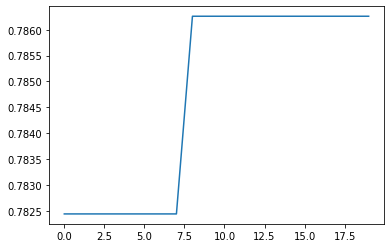

In [28]:
plt.plot(accs)

## Task 4

In [29]:
l, r = 0.0001, 1
i = 0
accs, cs = [], []
while l < r:
    if i == 20: break
    mid = (r+l)/2
    lsvc = SVC(kernel = 'rbf', C = 39, gamma = l)
    lsvc.fit(x_train, y_train)
    y_pred = lsvc.predict(x_test)
    lacc = accuracy_score(y_test, y_pred)
    rsvc = SVC(kernel = 'rbf', C = 39, gamma = r)
    rsvc.fit(x_train, y_train)
    y_pred = rsvc.predict(x_test)
    racc = accuracy_score(y_test, y_pred)
    print(l,r, lacc, racc)
    if lacc >= racc:
        r = round(mid,3)
        svc = lsvc
        cs.append(l)
    else:
        l = round(mid, 3)
        svc = rsvc
        cs.append(r)
    y_pred = svc.predict(x_test) 
    accs.append(accuracy_score(y_test, y_pred))
    #cs.append(mid)
    i += 1

0.0001 1 0.7404580152671756 0.7519083969465649
0.5 1 0.7862595419847328 0.7519083969465649
0.5 0.75 0.7862595419847328 0.7824427480916031
0.5 0.625 0.7862595419847328 0.7824427480916031
0.5 0.562 0.7862595419847328 0.7824427480916031
0.5 0.531 0.7862595419847328 0.7862595419847328
0.5 0.516 0.7862595419847328 0.7862595419847328
0.5 0.508 0.7862595419847328 0.7862595419847328
0.5 0.504 0.7862595419847328 0.7862595419847328
0.5 0.502 0.7862595419847328 0.7862595419847328
0.5 0.501 0.7862595419847328 0.7862595419847328


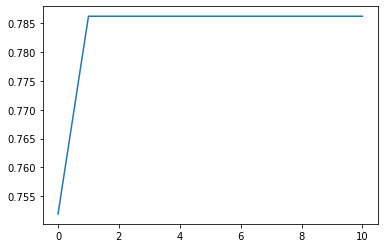

In [30]:
plt.plot(accs)

## Pre Processing on Forest Cover Dataset

In [31]:
forest = pd.read_csv("covtype.csv")
forest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [32]:
forest.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [33]:
X1 = forest.copy()
X1[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']] = scaler.fit_transform(X1[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']])
X1 = X1.drop(columns = ['Cover_Type'])
Y1 = forest['Cover_Type']
print(Y1.shape)
X1.head()

(581012,)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0,0,0,0,0,0,0,0,0,0
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0,0,0,0,0,0,0,0,0,0
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0,0,0,0,0,0,0,0,0,0
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0,0,0,0,0,0,0,0,0,0
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0,0,0,0,0,0,0,0,0,0


In [34]:
_, subset_x, _, subset_y = train_test_split(X1, Y1, stratify = Y1, test_size = 0.2, random_state = 42)
x_train1, x_test1, y_train1, y_test1 = train_test_split(subset_x, subset_y, stratify = subset_y, test_size = 0.1, random_state = 42)
print(x_train1.shape, x_test1.shape)
print(y_train1.shape, y_test1.shape)

(104582, 54) (11621, 54)
(104582,) (11621,)


## Task 1

In [35]:
svc = SVC(kernel='linear')
ovr = OneVsRestClassifier(svc)
ovr.fit(x_train1,y_train1)
y_pred1 = ovr.predict(x_test1)
acc1 = accuracy_score(y_test1,y_pred1)

In [36]:
cm = confusion_matrix(y_test1,y_pred1,labels=ovr.classes_)
print(cm)

[[3000 1154    4    0    2    2   75]
 [1038 4462  125    0    1   23   18]
 [   0   68  635    2    0   10    0]
 [   0    0   44   10    0    1    0]
 [   3  168    9    0    0   10    0]
 [   0  133  197    0    0   17    0]
 [ 206    0    1    0    0    0  203]]


[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7')]

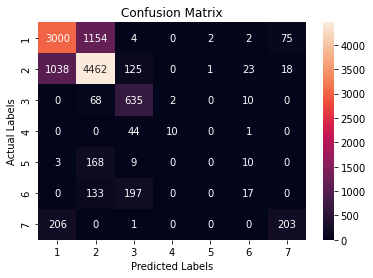

In [37]:
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.xaxis.set_ticklabels(ovr.classes_)
ax.yaxis.set_ticklabels(ovr.classes_)

In [38]:
ovo = OneVsOneClassifier(svc)
ovo.fit(x_train1,y_train1)
y_pred2 = ovo.predict(x_test1)
acc2 = accuracy_score(y_test1,y_pred2)

In [39]:
cm = confusion_matrix(y_test1,y_pred2,labels=ovo.classes_)
print(cm)

[[3040 1122    1    0    0    2   72]
 [1056 4498   90    0    0   11   12]
 [   0   67  628    5    0   15    0]
 [   0    0   43   11    0    1    0]
 [   0  186    4    0    0    0    0]
 [   0   87  206    3    0   51    0]
 [ 188    1    0    0    0    0  221]]


[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7')]

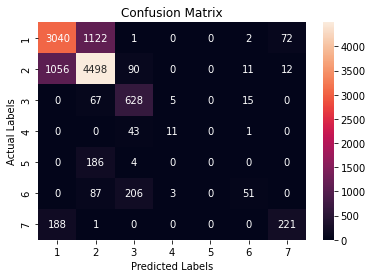

In [40]:
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.xaxis.set_ticklabels(ovo.classes_)
ax.yaxis.set_ticklabels(ovo.classes_)

In [41]:
print("OvR Acc Score: ",acc1)
print("OvO Acc Score: ",acc2)

OvR Acc Score:  0.7165476292917994
OvO Acc Score:  0.7270458652439549
